In [20]:
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist

# Load the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shapes of the training and testing data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [21]:
import numpy as np

# Reshape input images to add a channel dimension
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [22]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.

In [23]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [24]:
# Shuffle the training data
randomize = np.arange(len(x_train))
np.random.shuffle(randomize)
x_train = x_train[randomize]
y_train = y_train[randomize]

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [27]:
# Define the model architecture
model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Flatten the output for dense layers
    layers.Flatten(),
    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [28]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
import tensorflow as tf

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize input images
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# If needed, split data into training and testing sets
# You may want to split further into training and validation sets
# Example:
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [30]:
import tensorflow as tf

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize input images
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Convert integer labels to one-hot encoded labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [31]:
import numpy as np

# Convert one-hot encoded labels to integer labels
y_train_int = np.argmax(y_train, axis=1)


In [32]:
# Train the model with sparse categorical cross-entropy loss
history = model.fit(x_train, y_train_int, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8945 - loss: 0.3460 - val_accuracy: 0.9803 - val_loss: 0.0658
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9830 - loss: 0.0522 - val_accuracy: 0.9835 - val_loss: 0.0541
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9892 - loss: 0.0339 - val_accuracy: 0.9891 - val_loss: 0.0374
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9918 - loss: 0.0238 - val_accuracy: 0.9878 - val_loss: 0.0475
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9951 - loss: 0.0180 - val_accuracy: 0.9881 - val_loss: 0.0414
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 0.9902 - val_loss: 0.0379
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9970 - loss: 0.0089 - val_accuracy: 0.9897 - val_loss: 0.0428
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9975 -

In [33]:
import numpy as np

# Convert one-hot encoded labels to integer labels
y_test_int = np.argmax(y_test, axis=1)

# Evaluate the model with integer labels
test_loss, test_accuracy = model.evaluate(x_test, y_test_int)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9853 - loss: 0.0562
Test Loss: 0.043872326612472534
Test Accuracy: 0.9890999794006348


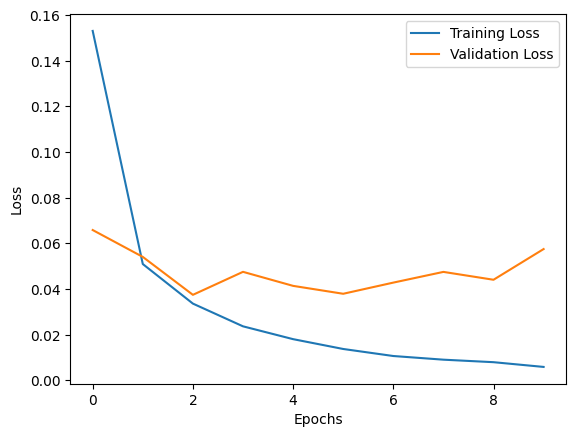

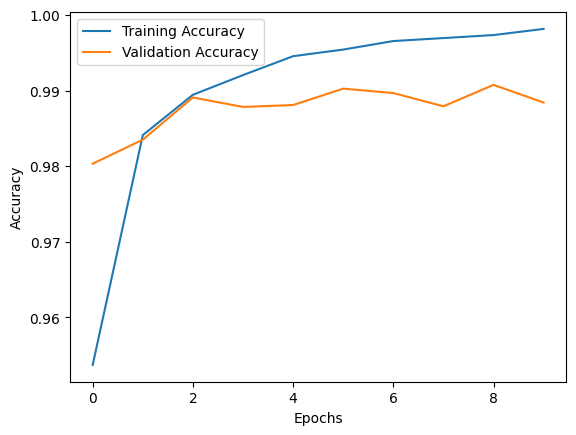

In [34]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [35]:
# Save the trained model
model.save('mnist_model.h5')


In [36]:
# Generate predictions for the test dataset
predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with actual labels
for i in range(len(x_test)):
    print("Actual Label:", np.argmax(y_test[i]), "Predicted Label:", predicted_labels[i])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Actual Label: 7 Predicted Label: 7
Actual Label: 2 Predicted Label: 2
Actual Label: 1 Predicted Label: 1
Actual Label: 0 Predicted Label: 0
Actual Label: 4 Predicted Label: 4
Actual Label: 1 Predicted Label: 1
Actual Label: 4 Predicted Label: 4
Actual Label: 9 Predicted Label: 9
Actual Label: 5 Predicted Label: 5
Actual Label: 9 Predicted Label: 9
Actual Label: 0 Predicted Label: 0
Actual Label: 6 Predicted Label: 6
Actual Label: 9 Predicted Label: 9
Actual Label: 0 Predicted Label: 0
Actual Label: 1 Predicted Label: 1
Actual Label: 5 Predicted Label: 5
Actual Label: 9 Predicted Label: 9
Actual Label: 7 Predicted Label: 7
Actual Label: 3 Predicted Label: 3
Actual Label: 4 Predicted Label: 4
Actual Label: 9 Predicted Label: 9
Actual Label: 6 Predicted Label: 6
Actual Label: 6 Predicted Label: 6
Actual Label: 5 Predicted Label: 5
Actual Label: 4 Predicted Label: 4
Actual Label: 0 Predicted Label: 0
Actual Label: 7 Predicted Label: 7
Actual Label: 

In [37]:
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist

# Load the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0


In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

# Load MNIST dataset
mnist = tf.keras.datasets.mnist

# Load the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Define a function to display images and their predictions
def display_image_with_prediction(image_index):
    # Get the image and its corresponding label
    image = x_test[image_index]
    actual_label = y_test[image_index]

    # Generate prediction for the image
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction)

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f"Actual Label: {actual_label} Predicted Label: {predicted_label}")
    plt.show()

# Create an interactive widget for selecting image index
interact(display_image_with_prediction, image_index=(0, len(x_test)-1))


C:\Users\prath\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8617 - loss: 0.4789 - val_accuracy: 0.9591 - val_loss: 0.1376
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9554 - loss: 0.1493 - val_accuracy: 0.9709 - val_loss: 0.0951
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9672 - loss: 0.1077 - val_accuracy: 0.9742 - val_loss: 0.0885
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9724 - loss: 0.0889 - val_accuracy: 0.9766 - val_loss: 0.0774
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9752 - loss: 0.0782 - val_accuracy: 0.9777 - val_loss: 0.0740
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0640 - val_accuracy: 0.9776 - val_loss: 0.0723
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0563 - val_accuracy: 0.9772 - val_loss: 0.0712
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9829 - loss: 0.0524 - 

interactive(children=(IntSlider(value=4999, description='image_index', max=9999), Output()), _dom_classes=('wi…

<function __main__.display_image_with_prediction(image_index)>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


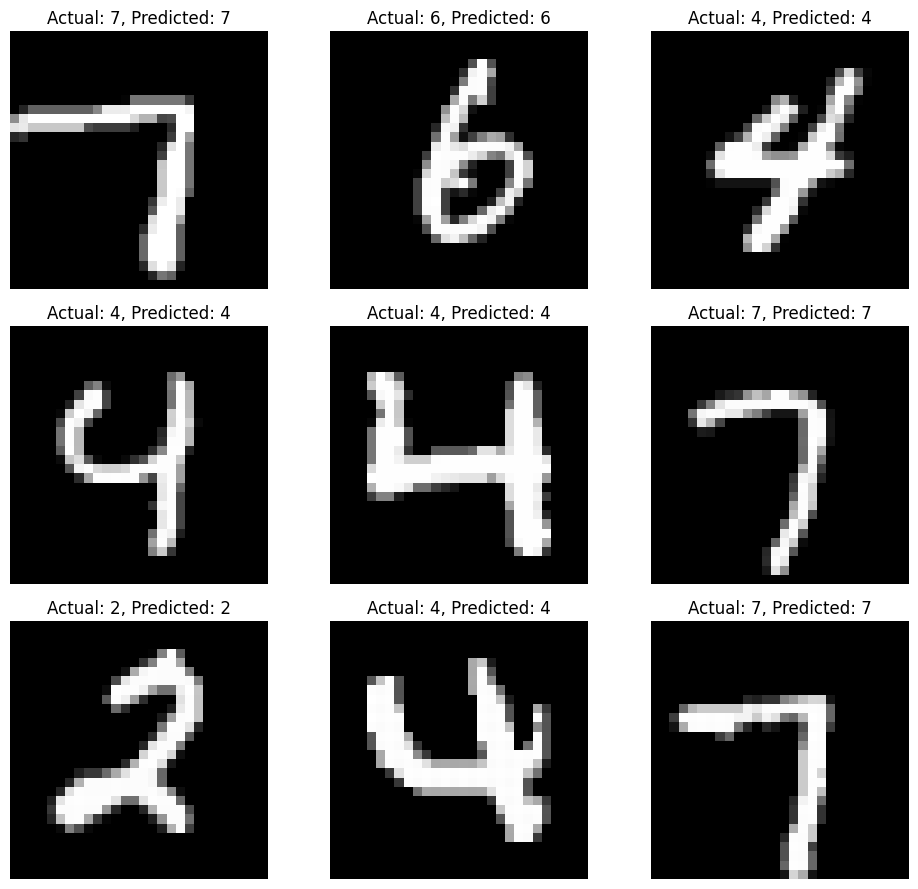

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to display images and their predictions
def display_images_with_predictions(image_indices):
    num_images = len(image_indices)
    num_cols = 3
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 3 * num_rows))

    for i, image_index in enumerate(image_indices):
        # Get the image and its corresponding label
        image = x_test[image_index]
        actual_label = y_test[image_index]

        # Generate prediction for the image
        prediction = model.predict(np.expand_dims(image, axis=0))
        predicted_label = np.argmax(prediction)

        # Display the image
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")

    plt.tight_layout()
    plt.show()

# Generate random image indices
random_image_indices = np.random.choice(len(x_test), 9, replace=False)

# Display images and predictions
display_images_with_predictions(random_image_indices)


In [41]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model('mnist_model.h5')


In [43]:
import os
print("Current directory:", os.getcwd())


Current directory: c:\Users\prath\Desktop\project


In [45]:
model = tf.keras.models.load_model(r'c:\Users\prath\Desktop\project\mnist_model.h5')


In [53]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model(r'c:\Users\prath\Desktop\project\mnist_model.h5')

# Function to preprocess the uploaded image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((28, 28))  # Resize image to match MNIST input shape
    img = img.convert('L')  # Convert to grayscale
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    return img, img_array

# Function to make prediction
def predict_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        # Preprocess the uploaded image
        img, img_array = preprocess_image(file_path)
        
        # Display the uploaded image
        img = ImageTk.PhotoImage(img)
        image_label.config(image=img)
        image_label.image = img
        
        # Make prediction using the model
        prediction = model.predict(np.expand_dims(img_array, axis=0))
        predicted_labels = np.argmax(prediction, axis=1)
        
        # Update prediction label
        if len(predicted_labels) > 1:
            prediction_label.config(text=f"Predicted Digits: {', '.join(map(str, predicted_labels))}")
        else:
            prediction_label.config(text=f"Predicted Digit: {predicted_labels[0]}")

# Create Tkinter GUI
root = tk.Tk()
root.title("Handwritten Digit Recognition")
root.configure(bg="black")

# Set font configuration
font_style = ("Times New Roman", 18, "bold")

# Create a label for displaying uploaded image
image_frame = tk.Frame(root, bg="black", highlightbackground="white", highlightthickness=2)
image_frame.pack(pady=20)
image_label = tk.Label(image_frame, bg="black")
image_label.pack()

# Create a button to upload image
upload_button = tk.Button(root, text="Upload Image", font=font_style, command=predict_image, bg="black", fg="white", bd=0)
upload_button.pack(pady=10)

# Create a label to display the predicted digits
prediction_label = tk.Label(root, text="Predicted Digits: ", font=font_style, bg="black", fg="white")
prediction_label.pack(pady=10)

root.geometry("500x400")  # Adjust window size

root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
